#Overview
Neural networks are universal function approximators. As the word "universal" is all-encompassing, we should be able to implement a simple "sum" function that takes an arbitrary number of arguments and returns the summation as follows:

$$\text{sum}(x_1,x_2,x_3,\dots,x_n) = x_1+x_2+x_3+\dots+x_n$$

We'll implement this function using an LSTM. 

This ipython notebook is designed to be compatible with Google Collaboratory (https://colab.research.google.com/) which gives you completely free access to GPU's.

#Preparation
##Uploading or Using Notebook
You need to signup and apply for access before you can start using Google Colab.
Once you have access, you can either upload this notebook directly to collaboratory using File → Upload Notebook or simply open a new notebook and enter the codes in the cells.
##Activating GPU
To enable GPU backend for your notebook, go to Edit → Notebook Settings and set Hardware accelerator to GPU.


##Installing Pytorch
We are going to use pytorch for tensor operations in GPU. Install pytorch using the following command. Doing it once is sufficient for a session.

In [9]:
# http://pytorch.org/
!pip install torch


#Import required modules
These are the modules necessary to implement a Long-Short Term Memory (LSTM) network in pyTorch.

In [0]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

#Define the LSTM from Basic Equations
To learn more on how LSTM works, [follow this link](http://colah.github.io/posts/2015-08-Understanding-LSTMs/).
We are defining a single layer LSTM with only one dimensional neurons. It can be modified in future.

In [0]:
class LSTM(nn.Module):
    def __init__(self):
        super(LSTM,self).__init__()
        self.W_xi = nn.Linear(1,1)
        self.W_hi = nn.Linear(1,1)
        self.W_xf = nn.Linear(1,1)
        self.W_hf = nn.Linear(1,1)
        self.W_xg = nn.Linear(1,1)
        self.W_hg = nn.Linear(1,1)
        self.W_xo = nn.Linear(1,1)
        self.W_ho = nn.Linear(1,1)

    def forward(self,x,h,c):
        i = torch.sigmoid(self.W_xi(x) + self.W_hi(h))
        f = torch.sigmoid(self.W_xf(x) + self.W_hf(h))
        g = F.relu(self.W_xg(x) + self.W_hg(h))
        o = F.sigmoid(self.W_xo(x)+self.W_ho(h))
        c_ = f*c + i*g
        h_ = o * F.relu(c_)
        return h_,c_

#Initialize the Model and the Optimizer

In [0]:
model = LSTM()
optimizer = optim.Adam(model.parameters(),lr=0.003)

# Train the model
Well, in this step, we'll train our single layer, one unit LSTM to sum a series. This is done by five thousand iterations. It will take a while to finish.

In [0]:
loss_list=[]
for i in range(10000):
    inp = np.random.rand(4)*100.
    h = Variable(torch.Tensor([[0.]]))
    c = Variable(torch.Tensor([[0.]]))
    output = Variable(torch.Tensor([[float(inp.sum())]]))
    model.zero_grad()
    for j in inp.tolist():
        inp = Variable(torch.Tensor([[j]]))
        h,c = model(inp,h,c)
    loss = (h-output)**2.
    loss_list.append(loss.data.numpy()[0][0])
    loss.backward()
    optimizer.step()

#View the Loss
Let's try to understand how well the network is trined by having a peek into the loss function.

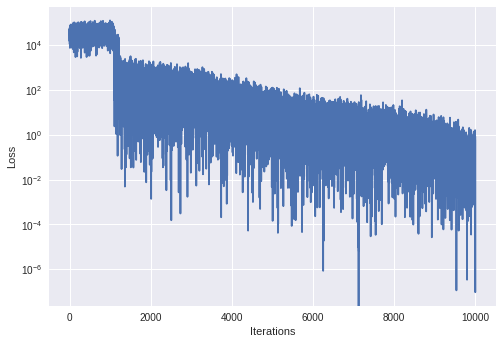

In [14]:
plt.semilogy(loss_list)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

Looks like the loss is reducing with an interesting pattern. Anyway, let's move forward and check what the network learned exactly. We define this testing function to test the output of the network for an input sequence.

In [0]:
def test(inp,model):
    h = Variable(torch.Tensor([[0.]]))
    c = Variable(torch.Tensor([[0.]]))
    for i in inp:
        h,c = model(Variable(torch.Tensor([[i]])),h,c)
    print '=================================='
    print 'input:',inp
    print 'model output:',h.data[0][0]
    print 'True answer should be:',np.sum(inp)

#Test Cases
Let's check the following test cases

In [16]:
test([1,2,3,4],model)
test([1,2,3,4,6,7,10],model)
test([10,20],model)
test([111,112,113,114],model)
test([7,8,9,10],model)

input: [1, 2, 3, 4]
model output: tensor(10.3458)
True answer should be: 10
input: [1, 2, 3, 4, 6, 7, 10]
model output: tensor(34.0467)
True answer should be: 33
input: [10, 20]
model output: tensor(30.4216)
True answer should be: 30
input: [111, 112, 113, 114]
model output: tensor(447.9915)
True answer should be: 450
input: [7, 8, 9, 10]
model output: tensor(34.9142)
True answer should be: 34


Not too bad, right? What do you think?